In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

In [2]:
# 한글처리
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
shin = pd.read_csv('./data/df_shin.csv')
food = pd.read_csv('./data/df_food.csv')
emart = pd.read_csv('./data/df_emart.csv')

In [9]:
df_all = pd.concat([shin['신세계 004170'],food['신세계푸드 031440'],emart['이마트 139480'],shin.iloc[:,1:]],axis=1)

In [10]:
df_all.columns

Index(['신세계 004170', '신세계푸드 031440', '이마트 139480', '신세계건설 034300',
       '신세계I&C 035510', '현대건설 000720', 'CJ제일제당 097950', '코스피', '달러 환율',
       '위안 환율'],
      dtype='object')

In [11]:
def reshape_series(sr):
    return sr.to_numpy().reshape(194180,1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
y_target = reshape_series(shin['신세계 004170'])
X_data = shin.drop(['신세계 004170'],axis=1,inplace=False)

lr = LinearRegression()
lr.fit(y_target ,X_data )

def myfunc(x):
    return slope * x + intercept

x = shin['달러 환율']
y = shin.iloc[:,0]


In [17]:
lr.coef_

array([[ 3.31573631e-01],
       [ 8.51470233e-02],
       [ 1.82437764e-01],
       [ 1.33602418e+00],
       [ 8.32903956e-03],
       [-2.07932822e-03],
       [-5.10112613e-05]])

In [16]:
shin.corr().iloc[:,0]

신세계 004170       1.000000
신세계건설 034300     0.875087
신세계I&C 035510    0.707266
현대건설 000720      0.770421
CJ제일제당 097950    0.724116
코스피              0.696704
달러 환율           -0.681864
위안 환율           -0.215642
Name: 신세계 004170, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

columns = shin.columns

scaler.fit(shin[columns])
scaled = scaler.transform(shin[columns])

shin_scaled = pd.DataFrame(data=scaled, columns=columns)

scaler = StandardScaler()

columns = food.columns

scaler.fit(food[columns])
scaled = scaler.transform(food[columns])

food_scaled = pd.DataFrame(data=scaled, columns=columns)

scaler = StandardScaler()

columns = emart.columns

scaler.fit(emart[columns])
scaled = scaler.transform(emart[columns])

emart_scaled = pd.DataFrame(data=scaled, columns=columns)

In [20]:
shin_scaled

,신세계 004170,신세계건설 034300,신세계I&C 035510,현대건설 000720,CJ제일제당 097950,코스피,달러 환율,위안 환율
0,2.053780,1.784977,0.834083,1.999255,1.660022,2.179998,-1.777154,-2.224684
1,2.053780,1.784977,0.834083,2.015768,1.649097,2.179795,-1.777154,-2.224684
2,2.053780,1.774337,0.834083,1.966057,1.660022,2.170420,-1.777154,-2.221275
3,2.013466,1.774337,0.817340,1.949543,1.649097,2.165733,-1.777154,-2.221275
4,1.952994,1.763698,0.800596,1.982741,1.681872,2.166340,-1.769222,-2.211050
...,...,...,...,...,...,...,...,...
194175,-1.723690,-1.297367,-0.820168,-0.992465,-2.185611,-0.171277,0.088207,-1.887245
194176,-1.715627,-1.297367,-0.820168,-1.000978,-2.174685,-0.176774,0.093495,-1.882133
194177,-1.715627,-1.298431,-0.820168,-0.992465,-2.185611,-0.177280,0.100105,-1.871907
194178,-1.715627,-1.298431,-0.820168,-0.992465,-2.174685,-0.177415,0.100105,-1.870203


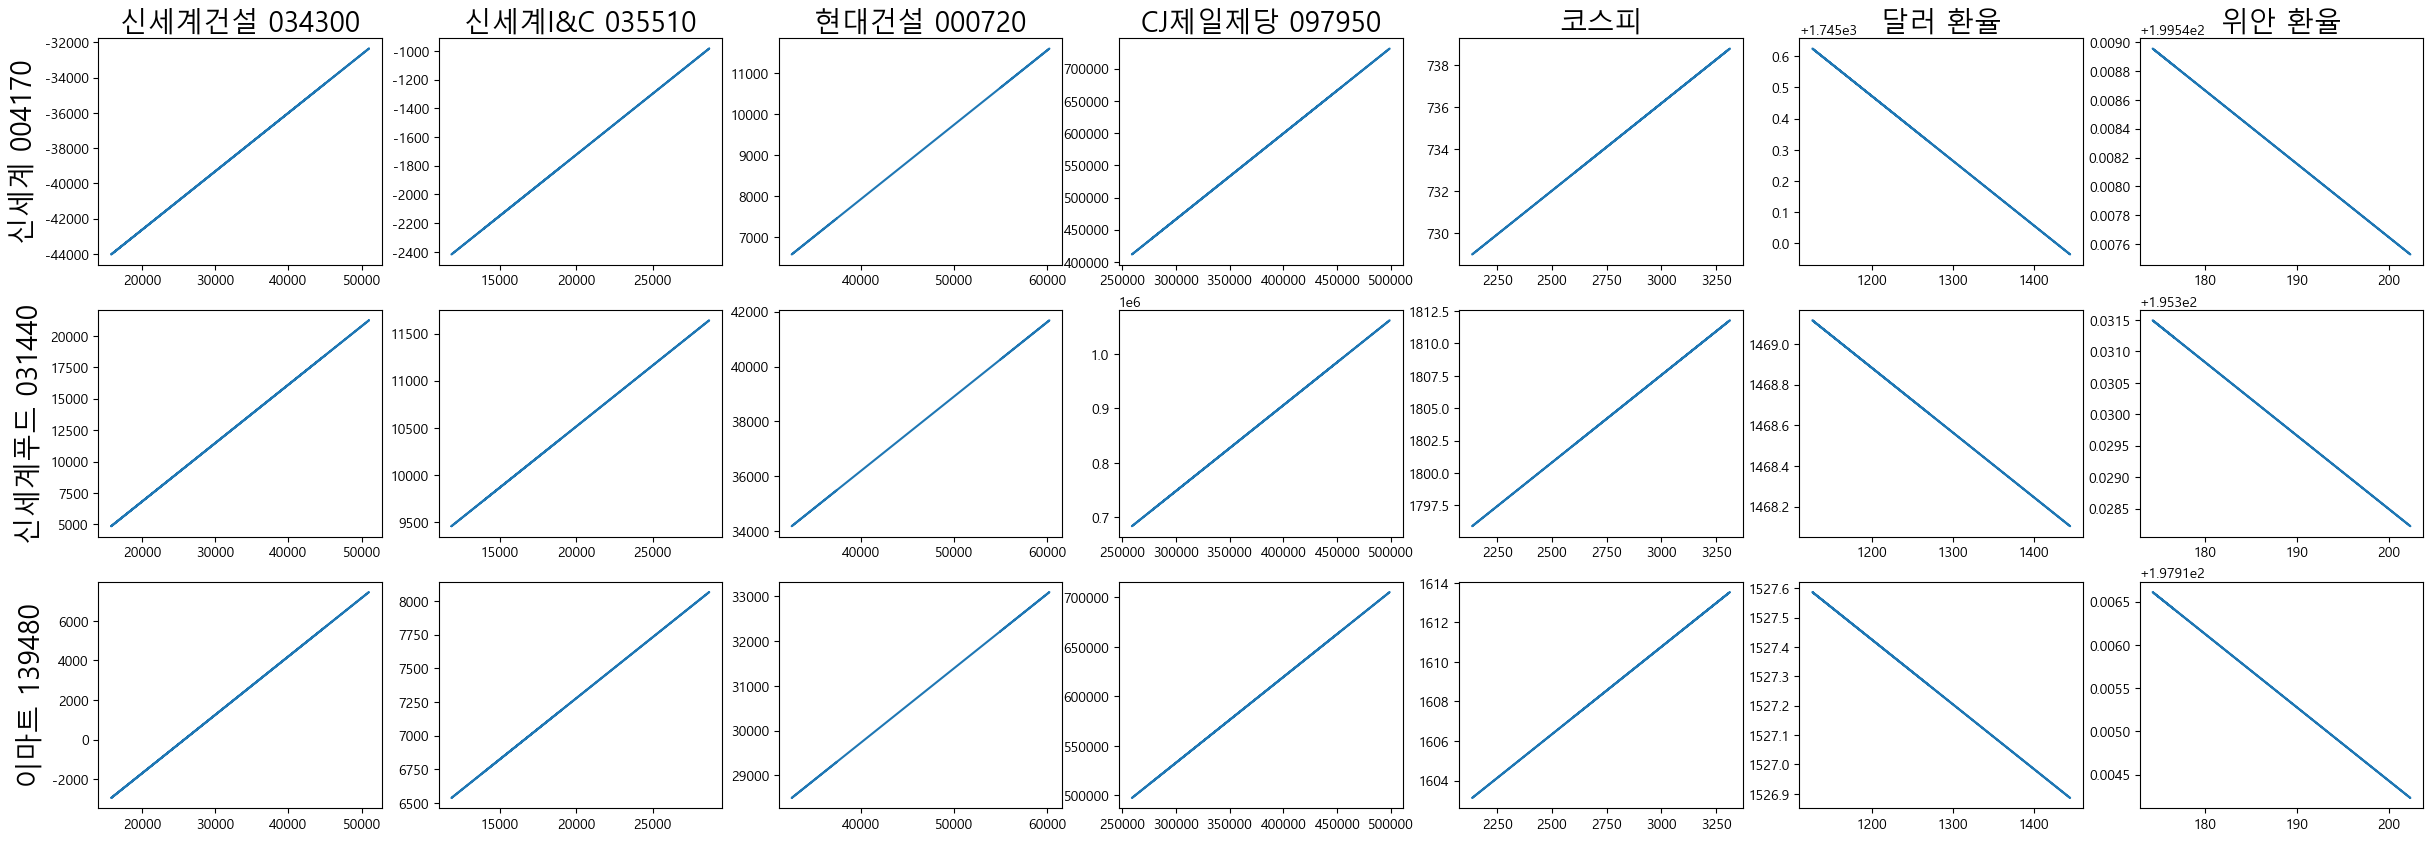

In [21]:
import matplotlib.pyplot as plt


def myfunc(x):
    return slope * x + intercept

fig, axes = plt.subplots(figsize=(30,10) , nrows=3, ncols=7 )


cols = ['{}'.format(col) for col in ['신세계건설 034300', '신세계I&C 035510', '현대건설 000720',
       'CJ제일제당 097950', '코스피', '달러 환율', '위안 환율']]
rows = ['{}'.format(row) for row in ['신세계 004170', '신세계푸드 031440', '이마트 139480']]


for ax, col in zip(axes[0], cols):
    ax.set_title(col, size=20, pad=5)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size=20)

# fig.tight_layout()


y_target = reshape_series(shin['신세계 004170'])
X_data = shin.drop(['신세계 004170'],axis=1,inplace=False)

lr = LinearRegression()
lr.fit(y_target ,X_data )

shin_coef = np.round(lr.coef_,1)

for i,column in enumerate(shin.columns[1:]):
    
    x = shin[column]
    y = shin.iloc[:,0]

    slope, intercept = lr.coef_[i], lr.intercept_[i]
    mymodel = list(map(myfunc, x))

    plt.subplot(3,7, i+1)
    plt.plot(x, mymodel)
    # plt.xlabel(column)



y_target = reshape_series(food['신세계푸드 031440'])
X_data = food.drop(['신세계푸드 031440'],axis=1,inplace=False)

lr = LinearRegression()
lr.fit(y_target ,X_data )


food_coef = np.round(lr.coef_,1)

for i,column in enumerate(food.columns[1:]):

    x = food[column]
    y = food.iloc[:,0]

    slope, intercept = lr.coef_[i], lr.intercept_[i]
    mymodel = list(map(myfunc, x))

    plt.subplot(3,7, i+8)
    plt.plot(x, mymodel)
    # plt.xlabel(column)

y_target = reshape_series(emart['이마트 139480'])
X_data = emart.drop(['이마트 139480'],axis=1,inplace=False)

lr = LinearRegression()
lr.fit(y_target ,X_data )

emart_coef = np.round(lr.coef_,1)

for i,column in enumerate(emart.columns[1:]):

    x = emart[column]
    y = emart.iloc[:,0]

    slope, intercept = lr.coef_[i], lr.intercept_[i]
    mymodel = list(map(myfunc, x))

    plt.subplot(3,7, i+15)
    plt.plot(x, mymodel)
    # plt.xlabel(column)




In [22]:
shin_coef.T, food_coef.T, emart_coef.T

(array([[ 0.3,  0.1,  0.2,  1.3,  0. , -0. , -0. ]]),
 array([[ 0.5,  0.1,  0.3,  1.6,  0. , -0. , -0. ]]),
 array([[ 0.3,  0.1,  0.2,  0.9,  0. , -0. , -0. ]]))

In [23]:
fp1 = np.polyfit(df_all['신세계 004170'], df_all['달러 환율'], 1)
fp1

array([-2.07932822e-03,  1.74796755e+03])

In [24]:
f1 = np.poly1d(fp1)

In [25]:
f1

poly1d([-2.07932822e-03,  1.74796755e+03])

In [26]:
fx = np.linspace(100000,700000,100) #십만~칠십만까지 100칸으로 나눔

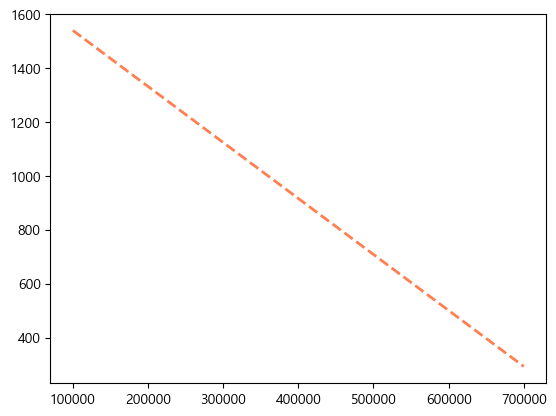

In [27]:
plt.plot(fx, f1(fx), ls='dashed',lw='2', color='coral')     # 표준데이터

In [28]:
df_all.columns

Index(['신세계 004170', '신세계푸드 031440', '이마트 139480', '신세계건설 034300',
       '신세계I&C 035510', '현대건설 000720', 'CJ제일제당 097950', '코스피', '달러 환율',
       '위안 환율'],
      dtype='object')

<Axes: title={'center': '위안 환율'}>

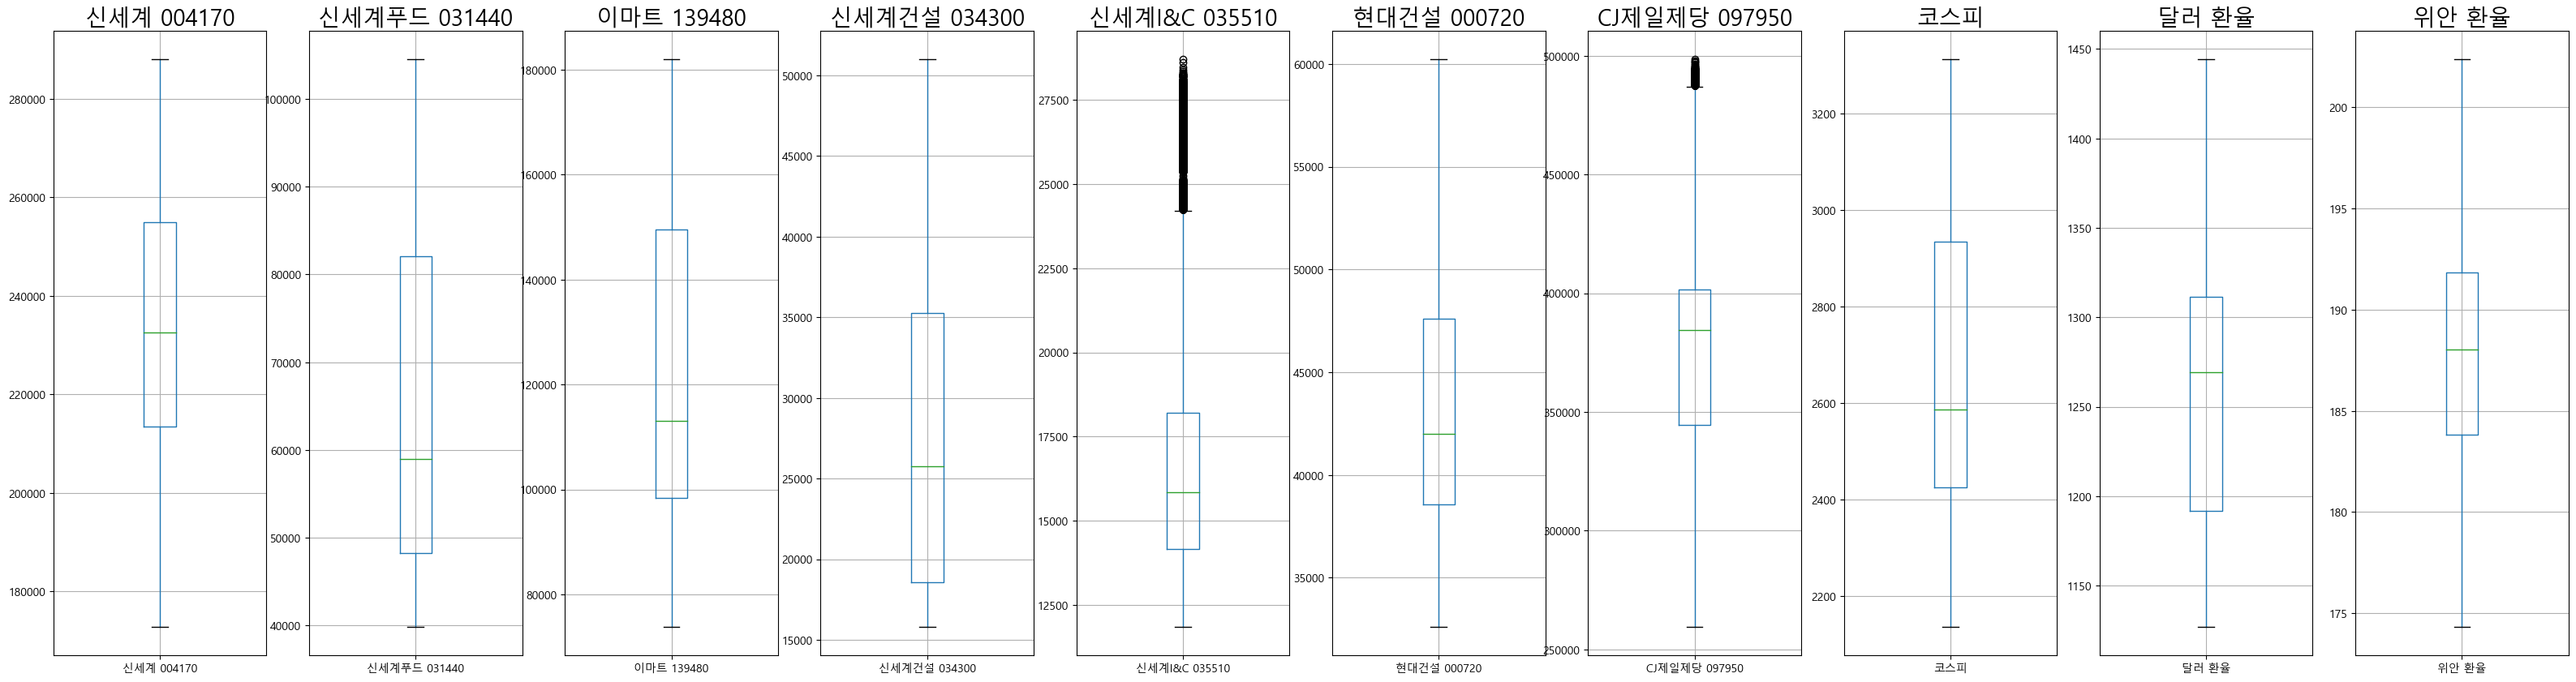

In [72]:
fig, axes = plt.subplots(figsize=(40,10) , nrows=1, ncols=10 )


cols = ['{}'.format(col) for col in ['신세계 004170', '신세계푸드 031440', '이마트 139480', '신세계건설 034300',
       '신세계I&C 035510', '현대건설 000720', 'CJ제일제당 097950', '코스피', '달러 환율',
       '위안 환율']]
# rows = ['{}'.format(row) for row in ['신세계 004170', '신세계푸드 031440', '이마트 139480']]

for axes, col in zip(axes, cols):
    axes.set_title(col, size=20, pad=5)

# for ax, row in zip(axes[:,0], rows):
#     ax.set_ylabel(row, size=20)

plt.subplot(1,10,1)
df_all.boxplot(column='신세계 004170')
plt.subplot(1,10,2)
df_all.boxplot(column='신세계푸드 031440')
plt.subplot(1,10,3)
df_all.boxplot(column='이마트 139480')
plt.subplot(1,10,4)
df_all.boxplot(column='신세계건설 034300')
plt.subplot(1,10,5)
df_all.boxplot(column='신세계I&C 035510')


plt.subplot(1,10,6)
df_all.boxplot(column='현대건설 000720')
plt.subplot(1,10,7)
df_all.boxplot(column='CJ제일제당 097950')
plt.subplot(1,10,8)
df_all.boxplot(column='코스피')
plt.subplot(1,10,9)
df_all.boxplot(column='달러 환율')
plt.subplot(1,10,10)
df_all.boxplot(column='위안 환율')

In [37]:
df_all['신세계 004170'].median()

232500.0

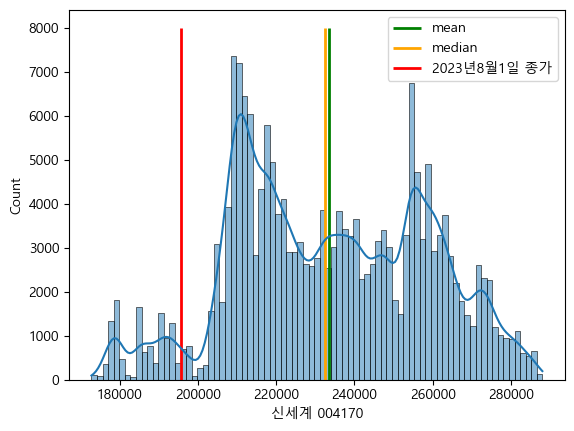

In [83]:
# 히스토그램
plt.vlines(df_all['신세계 004170'].mean(), 0,8000, color='green', linestyle='-', linewidth=2, label='mean',)
plt.vlines(df_all['신세계 004170'].median(), 0,8000, color='orange', linestyle='-', linewidth=2, label='median')
plt.vlines(195700, 0,8000, color='red', linestyle='-', linewidth=2, label='2023년8월1일 종가')
sns.histplot(df_all['신세계 004170'], kde=True)
plt.legend()
plt.show()

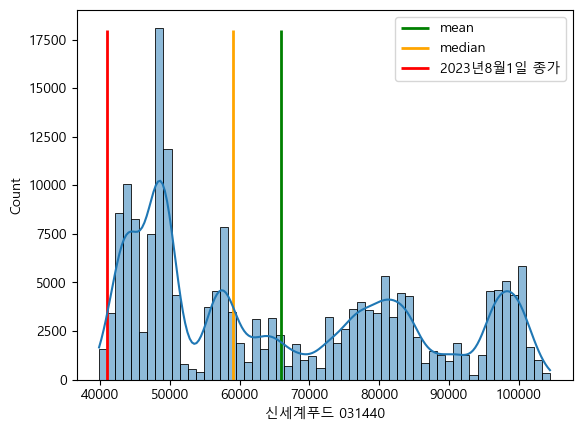

In [81]:
plt.vlines(df_all['신세계푸드 031440'].mean(), 0,18000, color='green', linestyle='-', linewidth=2, label='mean')
plt.vlines(df_all['신세계푸드 031440'].median(), 0,18000, color='orange', linestyle='-', linewidth=2, label='median')
plt.vlines(41000, 0,18000, color='red', linestyle='-', linewidth=2, label='2023년8월1일 종가')
sns.histplot(df_all['신세계푸드 031440'], kde=True,legend='price')
plt.legend()
plt.show()

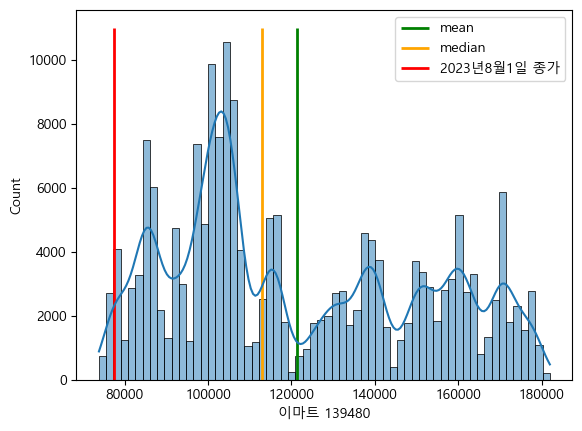

In [84]:
plt.vlines(df_all['이마트 139480'].mean(), 0,11000, color='green', linestyle='-', linewidth=2, label='mean')
plt.vlines(df_all['이마트 139480'].median(), 0,11000, color='orange', linestyle='-', linewidth=2, label='median')
plt.vlines(77400, 0,11000, color='red', linestyle='-', linewidth=2, label='2023년8월1일 종가')
sns.histplot(df_all['이마트 139480'], kde=True,legend='price')
plt.legend()
plt.show()

In [45]:
df_all.columns

Index(['신세계 004170', '신세계푸드 031440', '이마트 139480', '신세계건설 034300',
       '신세계I&C 035510', '현대건설 000720', 'CJ제일제당 097950', '코스피', '달러 환율',
       '위안 환율'],
      dtype='object')

In [27]:
food.iloc[:,1:]

,신세계건설 034300,신세계I&C 035510,현대건설 000720,CJ제일제당 097950,코스피,달러 환율,위안 환율
0,44950.0,18950.0,54973.0,453000.0,3302.969971,1127.9,174.59
1,44950.0,18950.0,55070.0,452500.0,3302.909912,1127.9,174.59
2,44850.0,18950.0,54778.0,453000.0,3300.129883,1127.9,174.61
3,44850.0,18900.0,54681.0,452500.0,3298.739990,1127.9,174.61
4,44750.0,18850.0,54876.0,454000.0,3298.919922,1128.5,174.67
...,...,...,...,...,...,...,...
194175,15980.0,14010.0,37400.0,277000.0,2605.719971,1269.0,176.57
194176,15980.0,14010.0,37350.0,277500.0,2604.090088,1269.4,176.60
194177,15970.0,14010.0,37400.0,277000.0,2603.939941,1269.9,176.66
194178,15970.0,14010.0,37400.0,277500.0,2603.899902,1269.9,176.67


In [36]:
df_all = pd.concat([shin, food.loc[:,'신세계푸드 031440'], emart.loc[:,'이마트 139480']],axis=1)
df_all.columns

Index(['신세계 004170', '신세계건설 034300', '신세계I&C 035510', '현대건설 000720',
       'CJ제일제당 097950', '코스피', '달러 환율', '위안 환율', '신세계푸드 031440', '이마트 139480'],
      dtype='object')

In [37]:
scaler = StandardScaler()

columns = df_all.columns

scaler.fit(df_all[columns])
scaled = scaler.transform(df_all[columns])
df_all_scaled = pd.DataFrame(data=scaled, columns=columns)

In [38]:
df_all_scaled['신세계 004170']

0         2.053780
1         2.053780
2         2.053780
3         2.013466
4         1.952994
            ...   
194175   -1.723690
194176   -1.715627
194177   -1.715627
194178   -1.715627
194179   -1.719659
Name: 신세계 004170, Length: 194180, dtype: float64

In [40]:
# 신세계 linearreg
y_target = reshape_series(df_all_scaled['신세계 004170'])
X_data = df_all_scaled.drop(['신세계 004170','신세계푸드 031440','이마트 139480'],axis=1,inplace=False)

# test_size=0.0006 : 약 6달
X_train , X_test , y_train , y_test = train_test_split(X_data ,y_target 
                                                       ,test_size=0.0001
                                                       ,shuffle=False)


lr = LinearRegression()
lr.fit(y=y_target ,X=X_data)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} \nRMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
for i in range(len(X_data.columns)):
    print('\n{} : {}'.format(X_data.columns[i],lr.coef_[0][i]))

MSE : 0.009 
RMSE : 0.092
Variance score : -426.092

신세계건설 034300 : 0.574841921066177

신세계I&C 035510 : 0.12201034551270293

현대건설 000720 : 0.004653943759147158

CJ제일제당 097950 : 0.3307841174677555

코스피 : -0.3166724386982221

달러 환율 : -0.3809682318954892

위안 환율 : 0.1432161851000384


In [133]:
# 신세계푸드 linearreg
y_target = reshape_series(food_scaled['신세계푸드 031440'])
X_data = food_scaled.drop(['신세계푸드 031440'],axis=1,inplace=False)

# test_size=0.0006 : 약 6달
# test_size=0.000025 : 약 5일
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target 
                                                       ,test_size=0.0001
                                                       ,shuffle=False)


lr = LinearRegression()
lr.fit(y=y_target ,X=X_data)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} \nRMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
for i in range(len(X_data.columns)):
    print('\n{} : {}'.format(X_data.columns[i],lr.coef_[0][i]))

MSE : 0.001 
RMSE : 0.037
Variance score : -2373.149

신세계건설 034300 : 0.36050682853170085

신세계I&C 035510 : 0.20530396516598048

현대건설 000720 : 0.10809874294572124

CJ제일제당 097950 : 0.31278092373985206

코스피 : 0.2490258269197047

달러 환율 : -0.3656752689233325

위안 환율 : 0.23932213770358796


In [128]:
X_data.columns

Index(['신세계건설 034300', '신세계I&C 035510', '현대건설 000720', 'CJ제일제당 097950', '코스피',
       '달러 환율', '위안 환율'],
      dtype='object')

In [130]:
lr.coef_

array([[ 0.36050683,  0.20530397,  0.10809874,  0.31278092,  0.24902583,
        -0.36567527,  0.23932214]])

In [98]:
# 이마트 linearreg
y_target = reshape_series(emart['이마트 139480'])
X_data = emart.drop(['이마트 139480','위안 환율'],axis=1,inplace=False)

# test_size=0.0006 : 약 6달
# test_size=0.000025 : 약 5일
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target 
                                                       ,test_size=0.000025
                                                       ,shuffle=False)


lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} ,\n RMSE : {1:.3F}'.format(mse , rmse))
# print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 139815871.930 ,
 RMSE : 11824.376


In [10]:
X_data.shape, y_target.shape, y_preds.shape

((194180, 7), (194180, 1), (7, 194180))

In [11]:
from sklearn.preprocessing import StandardScaler

In [17]:
y_target.shape,y_preds[0].reshape(194180,1).shape

((194180, 1), (194180, 1))

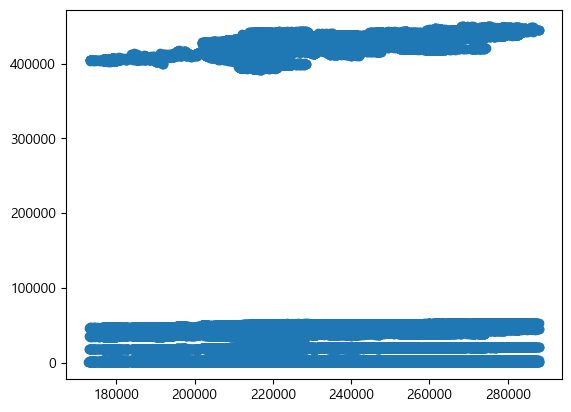

In [22]:
plt.scatter(y_target,y_preds[0].reshape(194180,1))

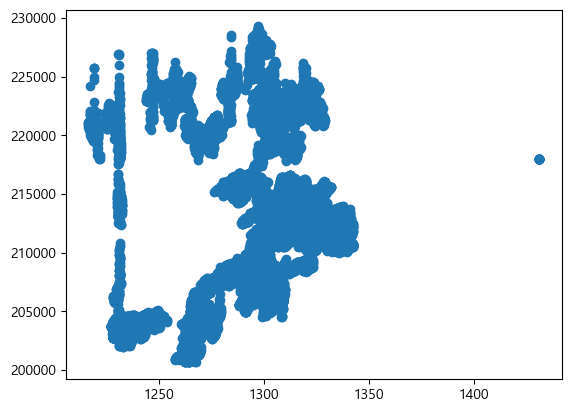

In [52]:
# fig, axs = plt.subplots(figsize=(20,3) , nrows=1, ncols=7 )
features = ['신세계건설 034300', '신세계I&C 035510', '현대건설 000720',
       'CJ제일제당 097950', '코스피', '달러 환율', '위안 환율']

for i , feature in enumerate(features):
    row = 1
    col = i
#     # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
#     sns.regplot(x=feature , y='신세계 004170',data=shin , ax=axs[row][col]) #상관관계 뽑는 plot

plt.scatter(X_test['달러 환율'],y_preds)
plt.show()
